<a href="https://colab.research.google.com/github/dubanteo19/AIThayDu/blob/main/Nh%C3%B3m_34_Mnist%2C_random_forestree%2C_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np # đại số tuyến tính
import pandas as pd # xử lý dữ liệu, import dataset
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import plot_model,to_categorical

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers


from prettytable import PrettyTable

In [ ]:
#Kết nối đến google drive và di chuyển đến thư mục chứa dataset
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/ML/mnist"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML/mnist


# **Phần I. Random Forest**


---


# **1. Chuẩn bị dataset**

Chúng ta sẽ chuẩn bị 2 tập là tập train và tập test\
Tập train gồm 60000 mẫu dữ liệu\
Tập test gồm 10000 mẫu dữ liệu

In [ ]:
#Load tập train và tập test
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")


In [ ]:
#In ra kích thước của dataset
print("Tập train có %i dòng và %i thuộc tính" %(train.shape[0],train.shape[1]))
print("Tập test có %i dòng và %i thuộc tính" %(test.shape[0],test.shape[1]))


Tập train có 60000 dòng và 785 thuộc tính
Tập test có 10000 dòng và 785 thuộc tính


In [ ]:
#In ra vài dòng đầu của tập train để kiểm tra
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Tách tập X và y
X_train = train.drop(columns="label")
y_train = train[["label"]]
X_test = test.drop(columns="label")
y_test = test[["label"]]


In [ ]:
#Kiểm tra vài dòng
X_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train["label"]

4

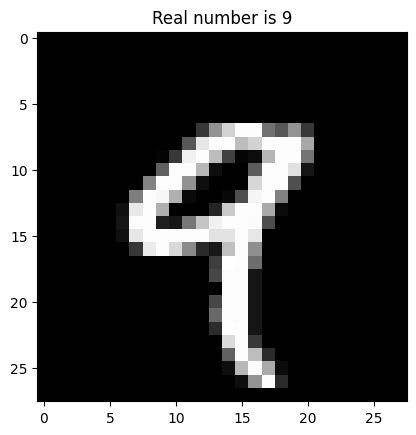

In [ ]:
#Xây dựng hàm in ra ảnh để xem
def print_i(row,data_frame,label):
  temp = data_frame.iloc[row,:].values
  temp = temp.reshape(28,28).astype('uint8')
  plt.imshow(temp,cmap="gray")
  plt.title(f"Real number is {label}")
# in ra 1 hình ảnh của tập train và nhãn của nó
print_i(4,X_train,y_train["label"][4])


# **2. Trực quan hóa dữ liệu**
Sử dụng các hàm vẽ biểu đồ để có thể trực quan hóa dữ liệu trước khi đưa vào train

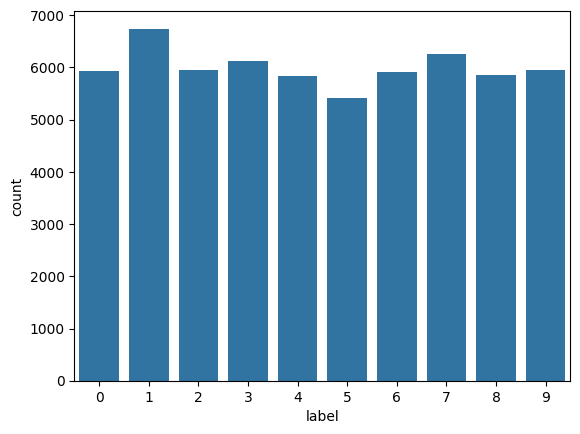

In [ ]:
#Vẽ biểu đồ tần suất xuất hiện của các chữ số trong tập train
sns.countplot(x=y_train["label"])
plt.show()

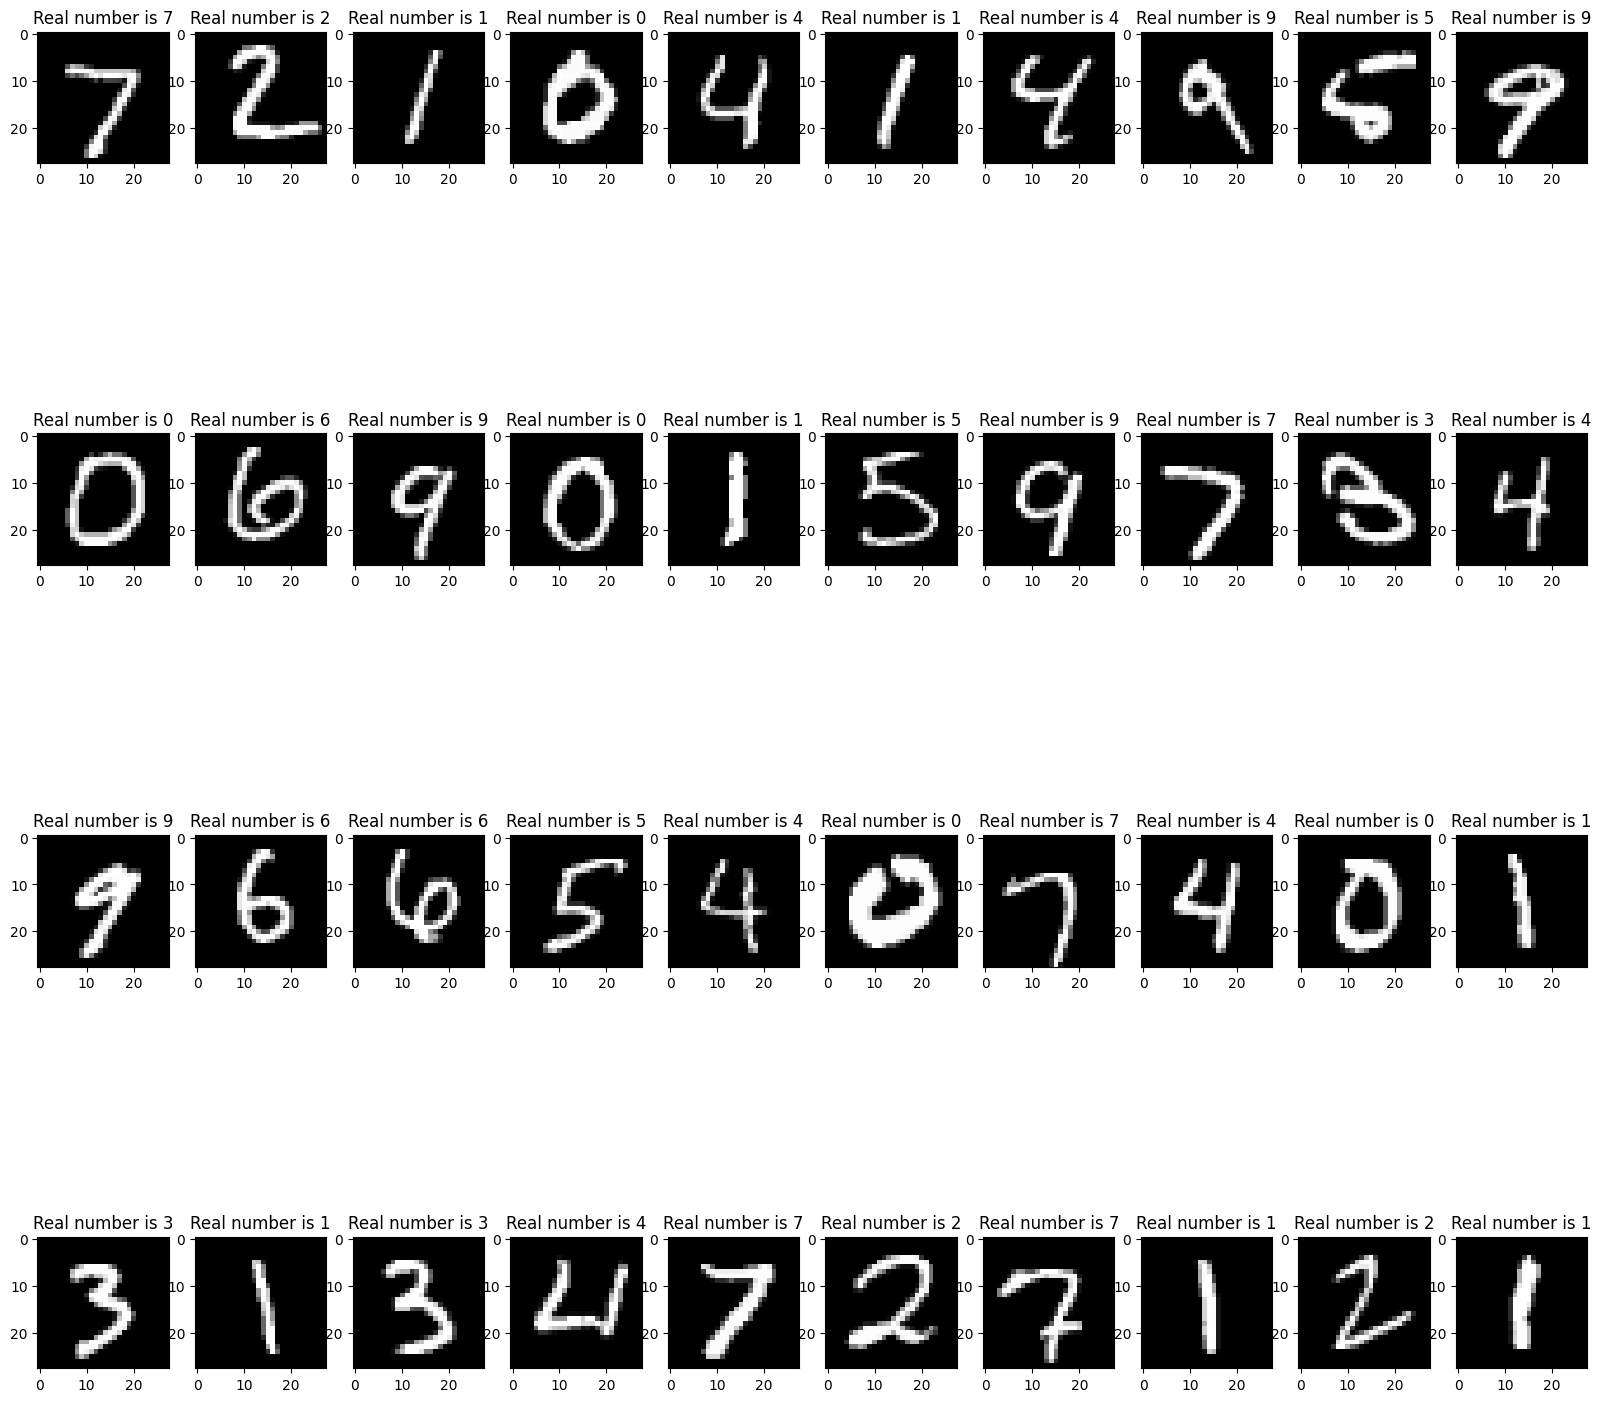

In [ ]:
#In ra 40 mẫu dữ liệu trong tập test
plt.figure(figsize=(20,20))
for i in range (40):
  plt.subplot(4,10,i+1)
  print_i(i,X_test,y_test["label"][i])

# **3. Xây dựng mô hình Random Forest**

Xây dựng và train mô hình với thuât toán Random Forest với estimator là 100

In [ ]:
#Train mô hình sử dụng thuật toán random Forest với n_estimators ban đầu là 100
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())



RandomForestClassifier()

# **4. Đánh giá mô hình**
Sử dụng 4 đơn vị để đánh giá mô hình Random Forest lầnlượt là
1. accuracy
2. presition
3. recall
4. f1

Sử dụng pretty table để in ra bảng đánh giá mô hình với các đơn vị đánh giá đã được tính



In [ ]:
#Sử dụng mô hình để dự đoán kết quả và đánh giá mô hình dựa trên 4 đơn vị lần lượt là accuracy,presition,recall,f1
pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred,average="macro")
recall = recall_score(y_test,pred,average="macro")
f1 = recall_score(y_test,pred,average="macro")
#Tạo Pretty table để dễ dàng quan sát và đánh giá mô hình
table = PrettyTable(["Algorithm","Accuracy","Presition","Recall","F1"])
table.add_row(["Random Forest",round(accuracy,4),round(precision,4),round(recall,4),round(f1,4)])
print(table)

+---------------+----------+-----------+--------+--------+
|   Algorithm   | Accuracy | Presition | Recall |   F1   |
+---------------+----------+-----------+--------+--------+
| Random Forest |  0.9699  |   0.9698  | 0.9697 | 0.9697 |
+---------------+----------+-----------+--------+--------+


Đánh giá bằng ma trận Confusion

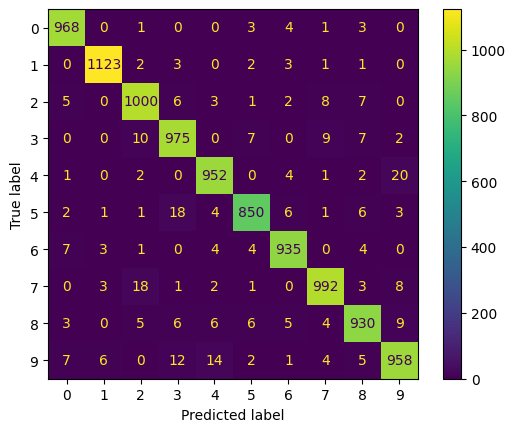

In [ ]:
#Vẽ ma trận Confusion để đánh gia mô hình
cm =confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()

Sử dụng Cross Validation (Kiểm tra chéo với cv=10) để đánh giá tổng quan mô hình

In [ ]:
#Kiểm tra chéo Cross validation với cv = 10
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf,X_train,y_train.values.ravel(),cv=10)


In [ ]:
#Tính điểm accuracy trung bình của 10 lần kiểm tra chéo
print(round(np.mean(scores),4))

0.9677



# **Phần II. Convolutional Neural Network**
Xây dựng và train mô hình với thuât toán mạng nơron tích chập (CNN)

---


# **1. Chuẩn bị dataset**

**1.1 Load dữ liệu**

In [ ]:
#Load tập train và tập test
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")


In [ ]:
# Tách tập X và y
X_train = train.drop(columns="label")
y_train = train[["label"]]
X_test = test.drop(columns="label")
y_test = test[["label"]]


**1.2 Chuẩn hóa dữ liệu**
Để có thể huấn luyện được trong thuật toán CNN dữ liệu phải được chuẩn hóa bằng cách chia giá trị của mỗi pixel cho 255

In [ ]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

**1.3 Thêm chiều không gian thứ 3**
Thêm chiều màu xám cho các hình

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

**1.4 Encode nhãn cho tập y**

In [ ]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

# **2. Xây dựng mô hình CNN**
# **2.1 Định nghĩa mô hình**
Chúng tôi đã sử dụng Keras Sequential API.

Đầu tiên là lớp tích chập (Conv2D). Nó giống như một tập hợp các bộ lọc có thể học được.Chúng tôi đã chọn đặt 64 bộ lọc cho hai lớp conv2D đầu tiên và 128 bộ lọc cho hai lớp thứ hai và 256 bộ lọc cho hai lớp thứ ba và 512 cho lớp cuối cùng. Mỗi bộ lọc biến đổi một phần của hình ảnh (được xác định bởi kích thước hạt nhân) bằng bộ lọc hạt nhân. Ma trận bộ lọc hạt nhân được áp dụng trên toàn bộ hình ảnh. Bộ lọc có thể được coi là sự biến đổi của hình ảnh.

CNN có thể tách biệt các đặc điểm hữu ích ở mọi nơi khỏi những hình ảnh được chuyển đổi này (bản đồ đặc trưng).

Lớp quan trọng thứ hai trong CNN là lớp gộp (MaxPool2D). Lớp này chỉ đơn giản hoạt động như một bộ lọc lấy mẫu xuống. Nó nhìn vào 2 pixel lân cận và chọn giá trị tối đa. Chúng được sử dụng để giảm chi phí tính toán và ở một mức độ nào đó cũng giảm việc trang bị quá mức.

Bên cạnh đó để tránh hiện tượng over fiting chúng tôi đã thêm 4 lớp dropout với kích thước lần lượt là 0.25, 0.25, 0.25, 0.2.

Lớp Flatten được sử dụng để chuyển đổi các bản đồ đặc trưng cuối cùng thành một vectơ 1D duy nhất. Bước làm phẳng này là cần thiết để bạn có thể sử dụng các lớp được kết nối đầy đủ sau một số lớp chập/maxpool. Nó kết hợp tất cả các tính năng cục bộ được tìm thấy của các lớp tích chập trước đó.

Cuối cùng, chúng tôi đã sử dụng các tính năng trong hai lớp được kết nối đầy đủ (Dense), đây chỉ là một bộ phân loại mạng thần kinh (ANN) nhân tạo. Ở lớp cuối cùng (Dense(10,activation="softmax")), phân phối xác suất đầu ra ròng của mỗi lớp.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 690,890 (2.64 MB)

 Trainable params: 690,890 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

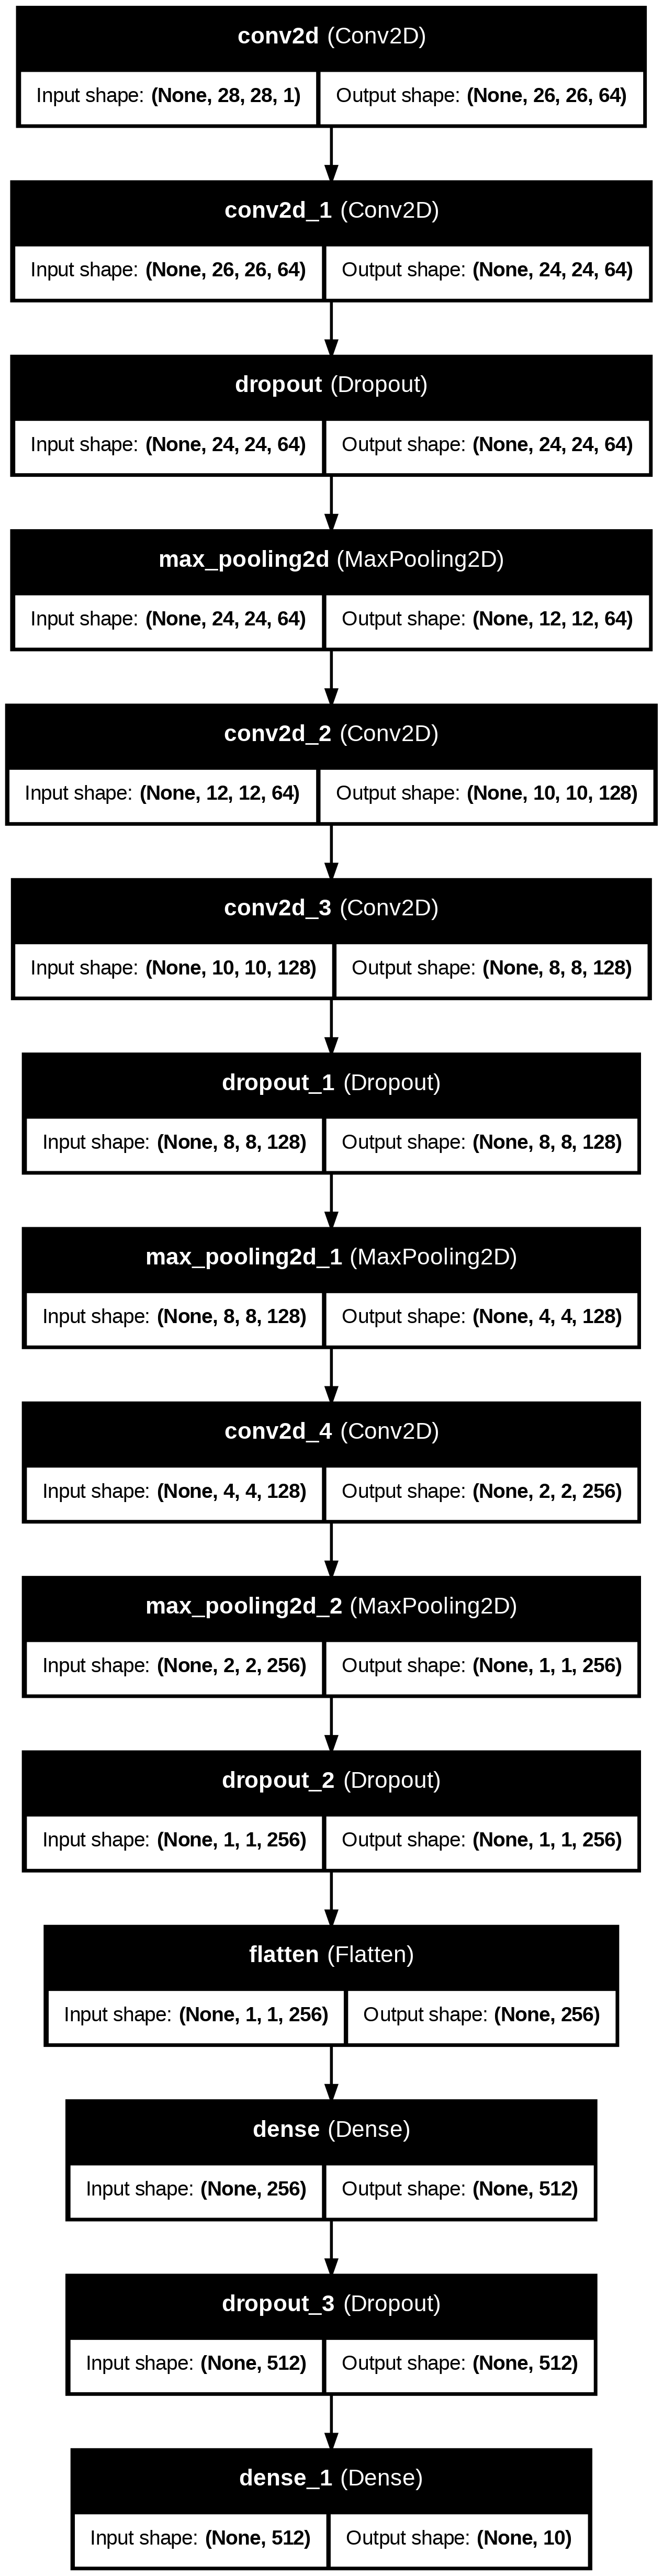

In [ ]:
plot_model(model,to_file="mnist_model.png",show_shapes=True,show_layer_names=True)

# **2.2 Huấn luyện mô hình**
Mô hình được huấn luyện với các tham số lần lượt là:\
batch_size = 64\
epochs = 10

In [ ]:
model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 513s 543ms/step - accuracy: 0.9118 - loss: 0.2817 - val_accuracy: 0.9866 - val_loss: 0.0471
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 564s 545ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9918 - val_loss: 0.0339
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 509s 543ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.9916 - val_loss: 0.0280
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 502s 535ms/step - accuracy: 0.9899 - loss: 0.0311 - val_accuracy: 0.9920 - val_loss: 0.0294
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 562s 535ms/step - accuracy: 0.9921 - loss: 0.0268 - val_accuracy: 0.9926 - val_loss: 0.0265
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 508s 542ms/step - accuracy: 0.9927 - loss: 0.0243 - val_accuracy: 0.9936 - val_loss: 0.0217
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 558s 537ms/step - accuracy: 0.9941 - loss: 0.0196 - val_accuracy: 0.9944 - val_loss: 0.0216
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 568s 544ms/step - accuracy: 0.9944 -

Sử dụng mô hình để dự đoán và đánh giá

In [ ]:
#Dự đoán y từ tập X_test
y_pred = model.predict(X_test)
#Dịch ngược từ onehot encoded thành nhãn từ 1 đến 9
y_pred = np.argmax(y_pred,axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step


# **2.3 Đánh giá và so sánh 2 mô hình**
So sánh kết quả dự đoán của 2 mô hình Random Forest và CNN với 4 tiêu chí là

*   Accuracy score
*   Precision score
*   Recall score
*   F1 score



In [ ]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average="macro")
recall = recall_score(y_test,y_pred,average="macro")
f1 = recall_score(y_test,y_pred,average="macro")
table.add_row(["Convolutional Neural Network",round(accuracy,4),round(precision,4),round(recall,4),round(f1,4)])
table
print(table)

+------------------------------+----------+-----------+--------+--------+
|          Algorithm           | Accuracy | Presition | Recall |   F1   |
+------------------------------+----------+-----------+--------+--------+
|        Random Forest         |  0.9699  |   0.9698  | 0.9697 | 0.9697 |
| Convolutional Neural Network |  0.9931  |   0.993   | 0.993  | 0.993  |
+------------------------------+----------+-----------+--------+--------+


# **Phần III. Kết luận**
Ta dễ đàng nhìn nhận rằng mô hình huấn luyện theo thuật toán CNN có độ chính xác vượt trội so với mô hình huấn luyệ sử dụng thuật toán Randon Forest.
Tuy nhiên mô hình thứ nhất huấn luyện tốn thời gian rất nhiều so với mô hình Random Forest (Khoảng 1 giờ 30 phút so với 2 phút của mô hình Random Forest)